# 无监督学习

## 聚类算法

自动将无标签树分类成有紧密关系的子集或是簇。

## K-Mean

1. 随机生成k个点
2. 遍历所有样本，根据离k个点的距离进行分类
3. 根据分类结果重新计算中心点
4. 重复 2-3 直至中心点位置收敛

### 算法输入
- K (Number of clusters)
- Training set 


如果在算法运行过程中有一个点没有属于它的样本点的话，有两种解决方法
1. 直接移除这个点，变成 K-1 个类
2. 重新初始化中心点重新进行训练


### K-Mean算法的优化目标

$$J(c^{(1)},...,c^{(m)},\mu_1,...,\mu_K) = \frac{1}{m}\sum_{i=1}^{m}\|x^{(i)} - \mu_{c^{(i)}}\|^2$$

这里的 $c^{(i)}$ 表示第 i 个样本属于哪一个聚类中心。

其实就是最小化类内间距（类内方差）


**我们尝试着来解释优化目标函数**

首先，当我们初始化了 K 个聚类中心的时候，k-Mean算法的第二步的意思是什么呢？其实就是在固定聚类中心 $\mu_i$的时候的成本函数最小化。

然后这个时候，就是说已经找到了一个对于当前聚类中心的最小化的分类结果，然而这个是最优的结果吗?不一定是，为什么？因为当前的这个聚类中心不一定是最优的，因为它是我们随机初始化的。

同样，根据方差的定理 $E(X-C)^2 \ge E(X-EX)^2 = D(X)$,就是说随机函数和它的数学期望的偏差程度最小，那么我们知道，只有当 $\mu_i = mean(\sum_{x_i \in \mu_i}x_i)$ 也就是说当 $\mu_i$ 是当前分类结果属于第i个分类的所有样本点的中心的时候,对于当前的分类结果 J 才最小，于是我们重新设定聚类中心点。

同理，由于我们移动了中心点，那么对于算法的第二步来说，样本的分类就不一定是最优分类结果了，就需要重新分类以求在重新规划的中心点得到方差最小的分类结果。

就这样，每一次的重新重新分类和移动中心点其实都是在减少目标函数J，直到达到一个收敛值。就是我们要的结果了。

### 局部最优

我们通过对优化目标的查看就知道，它的目的是最小化类内方差，那么可能会造成局部最优，也就是说它不能获得较好的分类结果。其实我们还应加一个条件，我们不仅应该期望类内方差最小，我们还应该期望类间方差最大。

+ 一个解决方法是我们可以多次运行K-Mean算法，并在这些个K-Mean算法里面寻找最好的分类结果的一种 （J 的最小化）

+ 通常来说如果分类数量较小的话，进行多次计算选优的方法能得到较好的分类结果，而如果分类数量较多比如几十个几百个的话这种方式就不是那么好了。


### 选择分类数量K

我们可以通过绘制不同数量的分类结果的目标函数J的值，来观察什么样的分类可能是最有效地。

一般来说，在拐点位置的分类数量可能就是比较好的分类结果，不能但看J的值，因为我们知道随着分类数量的增加J的值是肯定会减少的。

当然，也很有可能出现没有明确拐点的情况，这种情况下我们可以根据当前的需要适当地指定分类的数量。

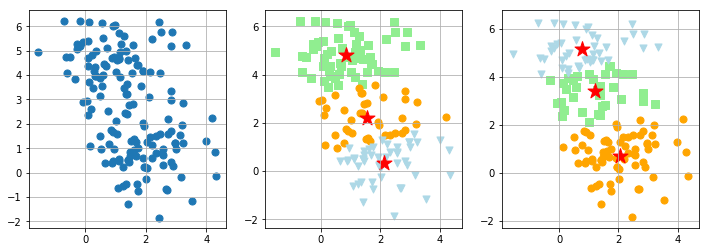

In [129]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, center_box=(-10,10),n_features=2, centers=2, cluster_std=0.99, shuffle=True, random_state=0)

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(X[:,0], X[:,1], marker="o", s=50)
plt.grid()

km = KMeans(n_clusters=3, init="random", n_init=1, max_iter=300, tol=1e-4, random_state=0)
y_km = km.fit_predict(X)
plt.subplot(132)
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, c="lightgreen", marker="s")
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, c="orange", marker="o")
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50, c="lightblue", marker="v")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker="*", c="red")
plt.grid()

km = KMeans(n_clusters=3, init="random", n_init=10, max_iter=300, tol=1e-4, random_state=0)
y_km = km.fit_predict(X)
plt.subplot(133)
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, c="lightgreen", marker="s")
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, c="orange", marker="o")
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50, c="lightblue", marker="v")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker="*", c="red")


plt.grid()
plt.show()

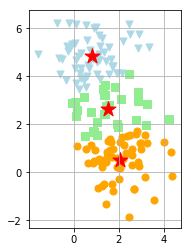

In [124]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init="k-means++", n_init=1, max_iter=300, tol=1e-4, random_state=0)

y_km = km.fit_predict(X)

plt.subplot(121)
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, c="lightgreen", marker="s")
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, c="orange", marker="o")
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50, c="lightblue", marker="v")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker="*", c="red")

plt.grid()
plt.show()